In [4]:
!pip install pandas
!python -m pip install pandas-datareader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
! pip install yfinance --upgrade --no-cache-dir

In [6]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('HAL', start=start, end=end)
df.head()






#start = '2010-01-01'
#end = '2019-12-31'
#df = data.DataReader('TSLA', 'yahoo', start, end)
#df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.719999,31.340000,30.660000,31.250000,25.074968,11571600
2010-01-05,31.280001,31.830000,30.990000,31.650000,25.395931,18989700
2010-01-06,31.740000,32.590000,31.639999,32.400002,25.997740,15720800
2010-01-07,32.310001,32.520000,31.920000,32.480000,26.061922,8993100
2010-01-08,32.950001,34.139999,32.490002,34.119999,27.377855,23014600


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,24.480000,24.950001,24.469999,24.889999,23.338465,11847800
2019-12-24,24.910000,25.340000,24.780001,24.860001,23.310337,5828500
2019-12-26,24.930000,24.990000,24.420000,24.540001,23.010286,10144900
2019-12-27,24.549999,24.690001,24.320000,24.400000,22.879015,8452600
2019-12-30,24.570000,24.990000,24.510000,24.559999,23.029037,9078400


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.719999,31.340000,30.660000,31.250000,25.074968,11571600
1,2010-01-05,31.280001,31.830000,30.990000,31.650000,25.395931,18989700
2,2010-01-06,31.740000,32.590000,31.639999,32.400002,25.997740,15720800
3,2010-01-07,32.310001,32.520000,31.920000,32.480000,26.061922,8993100
4,2010-01-08,32.950001,34.139999,32.490002,34.119999,27.377855,23014600


In [9]:
df = df.drop(['Date' , 'Adj Close'],  axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,30.719999,31.340000,30.660000,31.250000,11571600
1,31.280001,31.830000,30.990000,31.650000,18989700
2,31.740000,32.590000,31.639999,32.400002,15720800
3,32.310001,32.520000,31.920000,32.480000,8993100
4,32.950001,34.139999,32.490002,34.119999,23014600


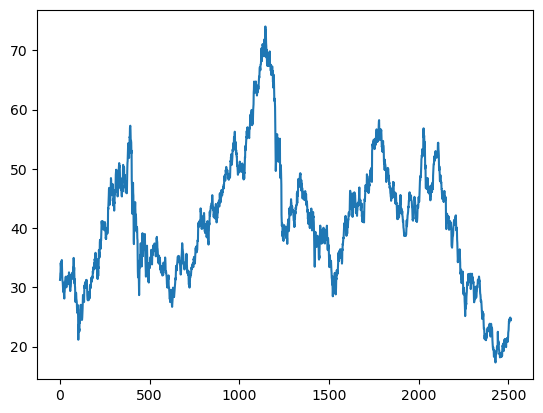

In [10]:
plt.plot(df.Close)

In [11]:
df


,Open,High,Low,Close,Volume
0,30.719999,31.340000,30.660000,31.250000,11571600
1,31.280001,31.830000,30.990000,31.650000,18989700
2,31.740000,32.590000,31.639999,32.400002,15720800
3,32.310001,32.520000,31.920000,32.480000,8993100
4,32.950001,34.139999,32.490002,34.119999,23014600
...,...,...,...,...,...
2510,24.480000,24.950001,24.469999,24.889999,11847800
2511,24.910000,25.340000,24.780001,24.860001,5828500
2512,24.930000,24.990000,24.420000,24.540001,10144900
2513,24.549999,24.690001,24.320000,24.400000,8452600


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2510    20.2219
2511    20.2605
2512    20.3028
2513    20.3473
2514    20.3964
Name: Close, Length: 2515, dtype: float64

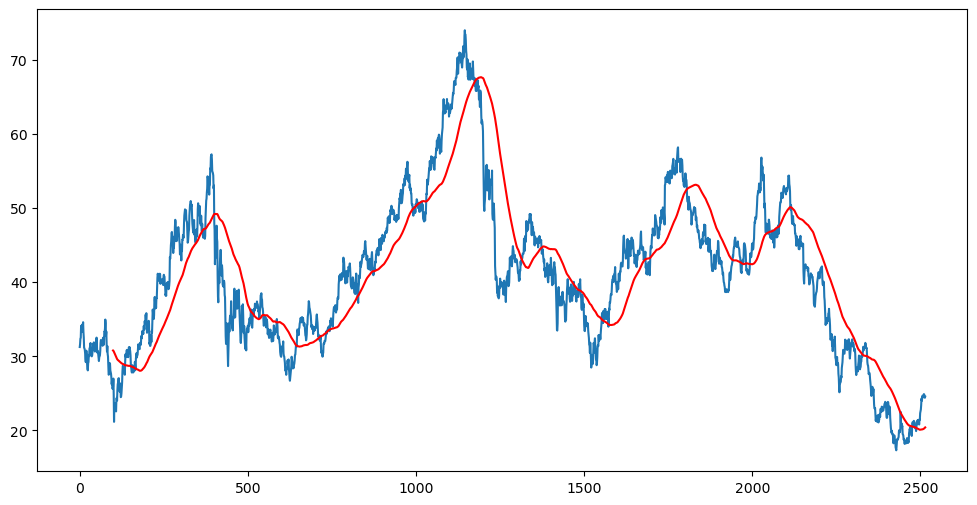

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2510    22.94985
2511    22.93370
2512    22.91390
2513    22.89355
2514    22.87650
Name: Close, Length: 2515, dtype: float64

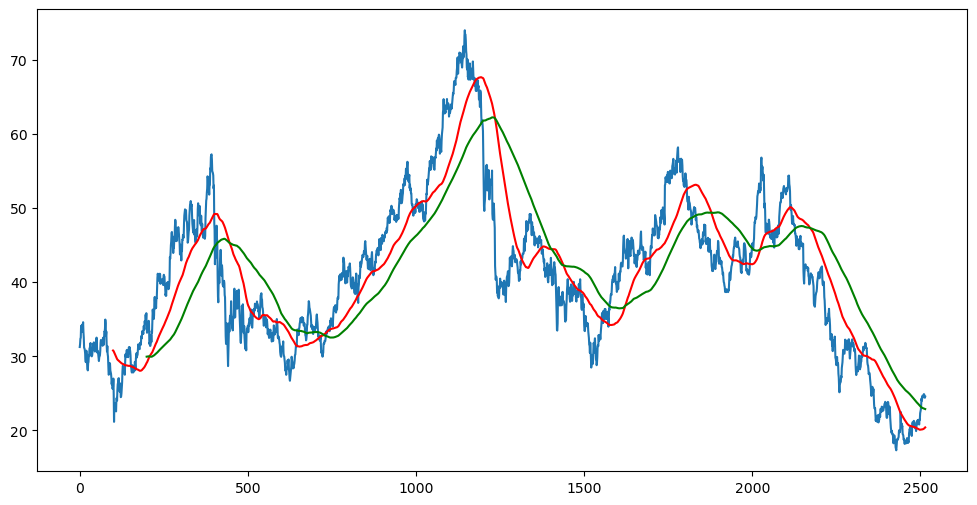

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [16]:
df.shape

(2515, 5)

In [17]:
# Splitting data into traning and testing

data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_traning.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [18]:
data_traning.head()

,Close
0,31.250000
1,31.650000
2,32.400002
3,32.480000
4,34.119999


In [19]:
data_testing.head()

,Close
1760,54.040001
1761,54.090000
1762,55.680000
1763,55.889999
1764,56.209999


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.19103463],
       [0.19860035],
       [0.21278613],
       ...,
       [0.63722342],
       [0.63854742],
       [0.62700967]])

In [22]:
data_traning_array.shape

(1760, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100: i])
    y_train.append(data_traning_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1660, 100, 1)

In [25]:
# ML Model


from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True , input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - loss: 0.0710
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0095
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0087
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0068
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0067
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0063
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0060
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 0.0060
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - loss: 0.0047
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 0.0051
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - loss: 0.0054
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - loss: 0.0050
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - loss: 0.0051
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0039
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 20

In [30]:
model.save('keras_model1.h5')

In [31]:
#model.save('my_model1.keras')

In [32]:
data_testing.head()

,Close
1760,54.040001
1761,54.090000
1762,55.680000
1763,55.889999
1764,56.209999


In [33]:
data_traning.tail(100)

,Close
1660,44.259998
1661,44.049999
1662,43.759998
1663,44.080002
1664,43.840000
...,...
1755,54.959999
1756,55.070000
1757,54.840000
1758,54.910000


In [34]:
past_100_days = data_traning.tail(100)

In [35]:
#final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [36]:
final_df.head()

,Close
0,44.259998
1,44.049999
2,43.759998
3,44.080002
4,43.840000


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.65892418],
       [0.65378973],
       [0.64669924],
       [0.65452329],
       [0.64865528],
       [0.66356972],
       [0.66772615],
       [0.67946208],
       [0.71271393],
       [0.72224937],
       [0.67897317],
       [0.67677268],
       [0.66112468],
       [0.66650368],
       [0.66625922],
       [0.67066021],
       [0.65427874],
       [0.62836184],
       [0.63325183],
       [0.63594133],
       [0.64596578],
       [0.6420538 ],
       [0.65550122],
       [0.60244503],
       [0.61344749],
       [0.58190712],
       [0.58557455],
       [0.59804404],
       [0.58019564],
       [0.58606356],
       [0.58557455],
       [0.62127144],
       [0.61955996],
       [0.59975552],
       [0.5885086 ],
       [0.57799515],
       [0.62298293],
       [0.65696824],
       [0.67408318],
       [0.67457218],
       [0.66699269],
       [0.69462108],
       [0.71051344],
       [0.70782394],
       [0.73227382],
       [0.71711492],
       [0.72493887],
       [0.726

In [38]:
input_data.shape

(855, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
#x_train , y_train = np.array(x_train), np.array(y_train)

In [40]:
x_test , y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [41]:
# Making Prediction

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [42]:
y_predicted.shape

(755, 1)

In [43]:
y_test

array([0.89804405, 0.89926653, 0.93814184, 0.94327629, 0.95110024,
       0.96210271, 0.94767728, 0.91271394, 0.93105135, 0.9259169 ,
       0.91026899, 0.92176037, 0.92469442, 0.92982888, 0.95696826,
       0.91662592, 0.96112469, 0.98044012, 0.99633257, 1.        ,
       0.95770172, 0.95990222, 0.95158925, 0.95305628, 0.96014677,
       0.94841074, 0.91858195, 0.93227383, 0.96259172, 0.9491443 ,
       0.95378975, 0.95916875, 0.94034233, 0.90464553, 0.88997555,
       0.89315406, 0.87408318, 0.8772616 , 0.86943765, 0.87750615,
       0.88386308, 0.91418097, 0.89388753, 0.89388753, 0.89217604,
       0.87188269, 0.83080689, 0.8210269 , 0.82151591, 0.82078244,
       0.79437653, 0.83691936, 0.82176037, 0.8183374 , 0.81491443,
       0.80293404, 0.79511009, 0.79217604, 0.78484109, 0.74498777,
       0.75085578, 0.78019565, 0.77530565, 0.7799511 , 0.78166258,
       0.78826406, 0.79559901, 0.80293404, 0.79144257, 0.79853306,
       0.79951098, 0.78288515, 0.75965775, 0.77090467, 0.76332

In [44]:
y_predicted

array([[0.8979434 ],
       [0.89686155],
       [0.8937563 ],
       [0.8952488 ],
       [0.9008969 ],
       [0.9088371 ],
       [0.9178262 ],
       [0.9243399 ],
       [0.92287266],
       [0.919001  ],
       [0.91449475],
       [0.9083202 ],
       [0.9041716 ],
       [0.9031749 ],
       [0.9050498 ],
       [0.9113921 ],
       [0.91458297],
       [0.9197093 ],
       [0.92765653],
       [0.93744326],
       [0.94776857],
       [0.9517034 ],
       [0.95044076],
       [0.9451237 ],
       [0.93908477],
       [0.9357736 ],
       [0.9334791 ],
       [0.9271208 ],
       [0.9212662 ],
       [0.92172575],
       [0.9249109 ],
       [0.92919147],
       [0.93389106],
       [0.9355575 ],
       [0.92849374],
       [0.91387606],
       [0.8990905 ],
       [0.8846394 ],
       [0.8735274 ],
       [0.86599565],
       [0.8634832 ],
       [0.86528504],
       [0.87212205],
       [0.87920773],
       [0.884377  ],
       [0.8871105 ],
       [0.88520753],
       [0.872

In [45]:
scaler.scale_

array([0.02444988])

In [46]:
scale_factor = 1/0.05953089

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

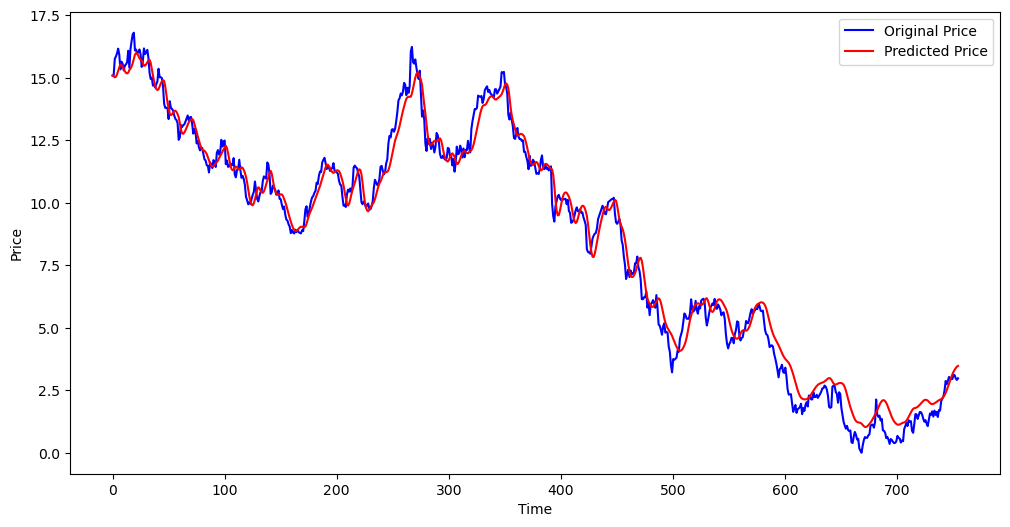

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
